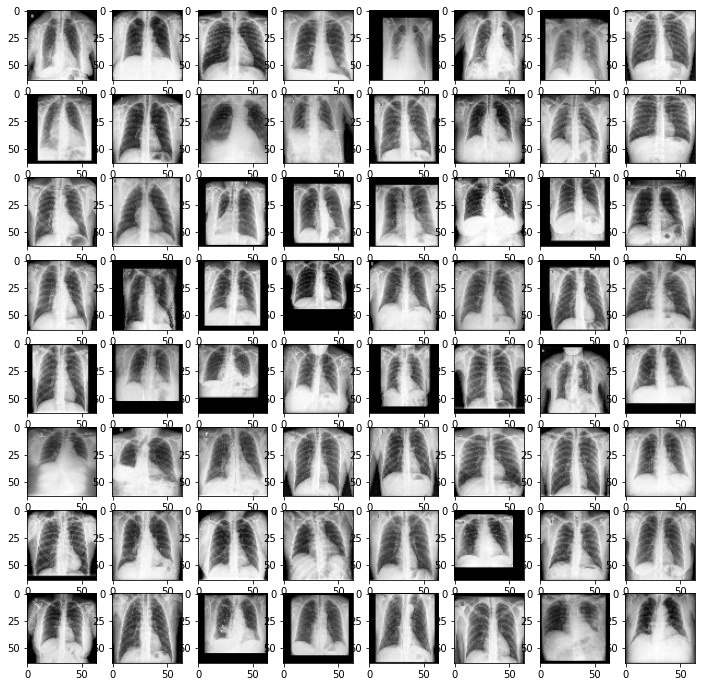

(53510, 64, 64, 1)


In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import pathlib
import cv2
from keras.models import Sequential,load_model,Model
from keras.layers import Conv2D,MaxPool2D,Dense,Dropout,BatchNormalization,Flatten,Input
from sklearn.model_selection import train_test_split



import matplotlib.pyplot as plt
import cv2
from keras.models import Sequential,load_model,Model
from keras.layers import Conv2D,MaxPool2D,Dense,Dropout,BatchNormalization,Flatten,Input
from sklearn.model_selection import train_test_split 


# Define the paths to the dataset folders and csv files
dataset_folder = r"C:\Users\leyne\Downloads\spr-x-ray-age\kaggle\kaggle"
train_folder = os.path.join(dataset_folder, "train")
test_folder = os.path.join(dataset_folder, "test")
train_csv = r"C:\Users\leyne\Downloads\spr-x-ray-age\train_age.csv"
submission_csv = r"C:\Users\leyne\Downloads\spr-x-ray-age\sample_submission_age.csv"

# Load the training ages dataset and display the first few rows
train_ages = pd.read_csv(train_csv)
train_ages.head()

# Load the paths to the training and test images and sort them
train_paths = sorted(list(pathlib.Path(train_folder).glob("*.png")))
test_paths = sorted(list(pathlib.Path(test_folder).glob("*.png")))

# Define a function to read and preprocess the images
def read_images(paths):
    images = []
    for path in paths:
        img = cv2.imread(str(path), 0)
        img = cv2.resize(img, (64, 64))
        img = img / 255
        images.append(img)
    return np.array(images)

# Read the training and test images
train_images = read_images(train_paths)
test_images = read_images(test_paths)

# Display a few training images
def show_images(images):
    plt.figure(figsize=(12, 12))
    for i in range(64):
        plt.subplot(8, 8, (i + 1))
        plt.imshow(images[i], cmap='gray')
    plt.show()

show_images(train_images)

# Extract the age labels from the training ages dataset
labels = train_ages['age'].values

# Create an image data generator for data augmentation
image_data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    shear_range=0.1, 
    horizontal_flip=True,
    zoom_range=0.3,
    rotation_range=0.2
)

# Define a function to apply data augmentation to the images and labels
def augment_data(images, labels):
    augmented_images = []
    augmented_labels = []
    for index, image in enumerate(images): 
        for i in range(5):
            img = image_data_generator.flow(np.reshape(image, (1, 64, 64, 1))).next()
            augmented_images.append(img)
            augmented_labels.append(labels[index])
    return np.array(augmented_images), np.array(augmented_labels)

# Apply data augmentation to the training images and labels
augmented_train_images, augmented_train_labels = augment_data(train_images, labels)

# Reshape the augmented training images and display their shape
augmented_train_images = np.reshape(augmented_train_images, (augmented_train_images.shape[0], 64, 64, 1))
print(augmented_train_images.shape)

# Split the augmented training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(augmented_train_images, augmented_train_labels, test_size=0.2, random_state=42)

# Define the model architecture
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1))



In [4]:
# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/150
1338/1338 [==============================] - 125s 93ms/step - loss: 514.3170 - mae: 18.4467 - val_loss: 308.8848 - val_mae: 14.4849
Epoch 2/150
1338/1338 [==============================] - 112s 84ms/step - loss: 356.7036 - mae: 15.1377 - val_loss: 200.6115 - val_mae: 11.8728
Epoch 3/150
1338/1338 [==============================] - 127s 95ms/step - loss: 298.5013 - mae: 13.6838 - val_loss: 159.4278 - val_mae: 10.0937
Epoch 4/150
1338/1338 [==============================] - 112s 83ms/step - loss: 280.2072 - mae: 13.2701 - val_loss: 162.6353 - val_mae: 10.2372
Epoch 5/150
1338/1338 [==============================] - 134s 100ms/step - loss: 260.0344 - mae: 12.7405 - val_loss: 144.1724 - val_mae: 9.6084
Epoch 6/150
1338/1338 [==============================] - 123s 92ms/step - loss: 248.4961 - mae: 12.4474 - val_loss: 139.8450 - val_mae: 9.5086
Epoch 7/150
1338/1338 [==============================] - 125s 93ms/step - loss: 236.1079 - mae: 12.1192 - val_loss: 120.5279 - val_mae: 8

1338/1338 [==============================] - 123s 92ms/step - loss: 72.0682 - mae: 6.6864 - val_loss: 78.5354 - val_mae: 7.0695
Epoch 59/150
1338/1338 [==============================] - 108s 81ms/step - loss: 70.6839 - mae: 6.6346 - val_loss: 84.2615 - val_mae: 7.2944
Epoch 60/150
1338/1338 [==============================] - 108s 80ms/step - loss: 71.3855 - mae: 6.6416 - val_loss: 81.6013 - val_mae: 7.1653
Epoch 61/150
1338/1338 [==============================] - 108s 81ms/step - loss: 71.0029 - mae: 6.6308 - val_loss: 79.8562 - val_mae: 7.1213
Epoch 62/150
1338/1338 [==============================] - 108s 81ms/step - loss: 69.8417 - mae: 6.5737 - val_loss: 83.2599 - val_mae: 7.2356
Epoch 63/150
1338/1338 [==============================] - 110s 82ms/step - loss: 69.7349 - mae: 6.5703 - val_loss: 81.2255 - val_mae: 7.1543
Epoch 64/150
1338/1338 [==============================] - 107s 80ms/step - loss: 70.5498 - mae: 6.6005 - val_loss: 80.1288 - val_mae: 7.1051
Epoch 65/150
1338/1338 [==

1338/1338 [==============================] - 107s 80ms/step - loss: 51.5691 - mae: 5.5563 - val_loss: 75.2197 - val_mae: 6.7657
Epoch 117/150
1338/1338 [==============================] - 108s 81ms/step - loss: 50.7588 - mae: 5.5179 - val_loss: 80.4844 - val_mae: 7.0742
Epoch 118/150
1338/1338 [==============================] - 107s 80ms/step - loss: 51.2757 - mae: 5.5355 - val_loss: 77.4907 - val_mae: 6.8575
Epoch 119/150
1338/1338 [==============================] - 107s 80ms/step - loss: 51.9639 - mae: 5.5626 - val_loss: 78.9429 - val_mae: 6.9338
Epoch 120/150
1338/1338 [==============================] - 109s 82ms/step - loss: 51.0821 - mae: 5.5340 - val_loss: 75.3397 - val_mae: 6.7513
Epoch 121/150
1338/1338 [==============================] - 107s 80ms/step - loss: 51.0144 - mae: 5.5151 - val_loss: 77.6215 - val_mae: 6.8881
Epoch 122/150
1338/1338 [==============================] - 107s 80ms/step - loss: 50.9521 - mae: 5.5171 - val_loss: 81.0854 - val_mae: 7.0746
Epoch 123/150
1338/1

In [7]:

model.evaluate(X_val, y_val, verbose=0)


[85.0987548828125, 7.246933460235596]

In [16]:
# Evaluate the model on the validation data
val_loss, val_mae = model.evaluate(X_val, y_val, verbose=0)

# Evaluate the model on the training data
train_loss, train_mae = model.evaluate(X_train, y_train, verbose=0)

# Print the validation and training loss and MAE
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation MAE: {val_mae:.4f}")
print(f"Training Loss: {train_loss:.4f}")
print(f"Training MAE: {train_mae:.4f}")

Validation Loss: 85.0988
Validation MAE: 7.2469
Training Loss: 26.7308
Training MAE: 4.2349


In [17]:
# Load the test images
test_images = read_images(test_paths)

# Reshape the test images
test_images = np.reshape(test_images, (test_images.shape[0], 64, 64, 1))

# Make predictions on the test data
predictions = model.predict(test_images)

# Print the predictions
print(predictions)

368/368 [==============================] - 14s 37ms/step
[[39.126816]
 [29.945717]
 [32.351543]
 ...
 [21.457018]
 [35.495525]
 [49.663383]]


In [18]:
# Save the model
model.save('model.h5')

In [25]:


# Create a DataFrame to hold the predictions
submission_df = pd.DataFrame({
    "imageId": range(len(predictions)),
    "age": predictions.flatten()
})

# Save the predictions to a CSV file
submission_df.to_csv("submission.csv", index=False)
